In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

In [2]:
mpl.rcParams['axes.linewidth'] = 1.
mpl.rcParams['axes.labelsize'] = 20.
mpl.rcParams['axes.titlesize'] = 14.
#mpl.rcParams['axes.labelweight'] = 'bold'
mpl.rcParams['xtick.labelsize']= 14.
mpl.rcParams['ytick.labelsize']= 14.
mpl.rcParams['xtick.major.size']= 14.
mpl.rcParams['xtick.minor.size']= 1.5
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.major.size']= 14.
mpl.rcParams['ytick.minor.size']= 2.5
mpl.rcParams['ytick.direction'] = 'in' 
mpl.rcParams['lines.markersize']= 8
mpl.rcParams['lines.markeredgewidth']=2
mpl.rcParams['ytick.minor.size']= 3.
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['legend.fontsize'] = 14
mpl.rcParams['legend.markerscale'] = 0.5
mpl.rcParams['legend.framealpha']=0.
mpl.rcParams['font.family'] = 'Times New Roman'

## Real events

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


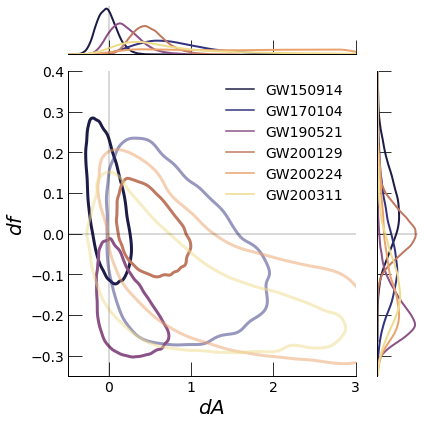

In [3]:
event_list = ["GW150914", "GW170104", "GW190521", "GW200129_wider_dnra", "GW200224", "GW200311"]
label_list = ["GW150914", "GW170104", "GW190521", "GW200129", "GW200224", "GW200311"]
colors = ["#1d1c47","#33327f","#8b5287","#c07961","#eaa36d","#eedc8c"]

g = sns.JointGrid()
axy = g.ax_joint
ax = g.ax_marg_x
ay = g.ax_marg_y



for idx, (label, event) in enumerate(zip(label_list, event_list)):
    data = np.genfromtxt(f"../runs/eob_merger_tgr/{event}/cbcBayes/posterior_samples.dat", names=True, dtype=None)
    
    da, df = data["dnra"], data["dnromega"]
    
    if label in ["GW150914", "GW190521", "GW200129"]:
        sns.kdeplot(x=da, y=df, levels=[0.1], ax=axy, color=colors[idx], linewidths=3)
    else:
        sns.kdeplot(x=da, y=df, levels=[0.1], ax=axy, color=colors[idx], linewidths=3, alpha=0.5)
        
    sns.kdeplot(x=da, fill=False, linewidth=2, ax=ax, color=colors[idx])
    sns.kdeplot(y=df, fill=False, linewidth=2, ax=ay, color=colors[idx])
    axy.plot(0, 0, color=colors[idx], label=label)
    
    
axy.axvline(x=0, color='k', alpha=0.2)    
axy.axhline(y=0, color='k', alpha=0.2)

ax.axvline(x=0, color='k', alpha=0.2)    
ay.axhline(y=0, color='k', alpha=0.2)


axy.legend(loc='best')  

axy.set_xlabel("$dA$")
axy.set_ylabel("$df$")

axy.set_xlim([-0.5, 3])
axy.set_ylim([-0.35, 0.4])

ax.set_xlim([-0.5, 3])
ay.set_ylim([-0.35, 0.4])

plt.tight_layout()
plt.savefig('./eob_merger_modifications_lvc_events.png')   

# Injections: GW190521

In [4]:
data_root = "../runs/eob_merger_tgr/injections/GW190521/gaussian_noise"

inj_list = np.arange(9)

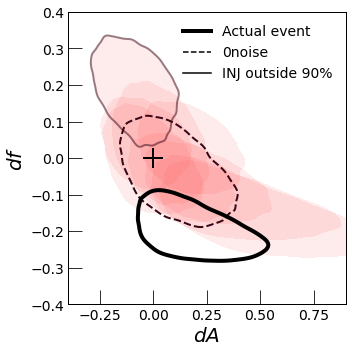

In [5]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)

for inj in inj_list:
    data = np.genfromtxt(data_root + f"/cbcBayes-{inj}/posterior_samples.dat", names=True, dtype=None)
    
    da, df = data["dnra"], data["dnromega"]
    
    sns.kdeplot(x=data["dnra"], y=data["dnromega"], levels=[0.1,1], ax=ax, fill=True, alpha=0.1, color='darkred')
    
    if inj == 2:
        sns.kdeplot(x=data["dnra"], y=data["dnromega"], color='#370617', levels=[0.1], ax=ax, linewidths=2, alpha=0.5)

# zero noise        
data = np.genfromtxt("../runs/eob_merger_tgr/injections/GW190521/zeronoise/cbcBayes/posterior_samples.dat", names=True, dtype=None)
da, df = data["dnra"], data["dnromega"]
sns.kdeplot(x=data["dnra"], y=data["dnromega"], color='#370617', levels=[0.1], ax=ax, linewidths=2, linestyles='--')

# actual event
data = np.genfromtxt("../runs/eob_merger_tgr/GW190521/cbcBayes/posterior_samples.dat", names=True, dtype=None)
da, df = data["dnra"], data["dnromega"]
sns.kdeplot(x=data["dnra"], y=data["dnromega"], color='k', levels=[0.3], ax=ax, linewidths=4)


ax.plot(0,0,"k+", ms=20)
ax.plot(0,0,color='k', linewidth=4, label='Actual event')
ax.plot(0,0,ls='--', color='k', label='0noise')
ax.plot(0,0,color='k', label='INJ outside 90%')
ax.legend(loc="best")

ax.set_xlim([-0.4, 0.9])
ax.set_ylim([-0.4, 0.4])

ax.set_xlabel("$dA$")
ax.set_ylabel("$df$")

plt.tight_layout()
plt.savefig('./eob_merger_modifications_GW190521_injections.png')   

# Injections: GW200129

In [6]:
data_root = "../runs/eob_merger_tgr/injections/GW200129/gaussian_noise"

inj_list = np.arange(9)

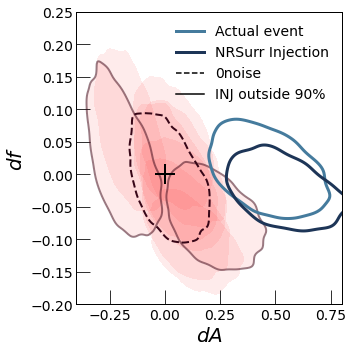

In [7]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)

for inj in inj_list:
    data = np.genfromtxt(data_root + f"/cbcBayes-{inj}/posterior_samples.dat", names=True, dtype=None)
    
    da, df = data["dnra"], data["dnromega"]
    
    sns.kdeplot(x=data["dnra"], y=data["dnromega"], levels=[0.1,1], ax=ax, fill=True, alpha=0.1, color='darkred')
    
    if inj == 7 or inj == 8:
        sns.kdeplot(x=data["dnra"], y=data["dnromega"], color='#370617', levels=[0.1], ax=ax, linewidths=2, alpha=0.5)

# zero noise        
data = np.genfromtxt("../runs/eob_merger_tgr/injections/GW200129/zeronoise/cbcBayes/posterior_samples.dat", names=True, dtype=None)
da, df = data["dnra"], data["dnromega"]
sns.kdeplot(x=data["dnra"], y=data["dnromega"], color='#370617', levels=[0.1], ax=ax, linewidths=2, linestyles='--')

# actual event
data = np.genfromtxt("../runs/eob_merger_tgr/GW200129_wider_dnra/cbcBayes/posterior_samples.dat", names=True, dtype=None)
da, df = data["dnra"], data["dnromega"]
sns.kdeplot(x=data["dnra"], y=data["dnromega"], color='#457b9d', levels=[0.4], ax=ax, linewidths=3)

# NR surrogate
data = np.genfromtxt("../runs/eob_merger_tgr/injections/GW200129/zeronoise_NRSurr/cbcBayes/posterior_samples.dat", names=True, dtype=None)
da, df = data["dnra"], data["dnromega"]
sns.kdeplot(x=data["dnra"], y=data["dnromega"], color='#1d3557', levels=[0.3], ax=ax, linewidths=3)



ax.plot(0,0,"k+", ms=20)
ax.plot(0,0,color='#457b9d', linewidth=3, label='Actual event')
ax.plot(0,0,color='#1d3557', linewidth=3, label='NRSurr Injection')
ax.plot(0,0,ls='--', color='k', label='0noise')
ax.plot(0,0,color='k', label='INJ outside 90%')
ax.legend(loc="best")

ax.set_xlim([-0.4, 0.8])
ax.set_ylim([-0.2, 0.25])

ax.set_xlabel("$dA$")
ax.set_ylabel("$df$")

plt.tight_layout()
plt.savefig('./eob_merger_modifications_GW200129_injections.png')   